In [2]:
from libraries import MyDAQ
from libraries import functions as H
import matplotlib.pyplot as plt
import numpy as np
import nidaqmx as dx
from scipy.signal import sawtooth, square
import libraries
from libraries import PMConverter
from scipy.fft import rfft, rfftfreq, irfft
import time
import random
import string
import scipy
all_list = [H.RC_C]

daq = MyDAQ()
daq.name = 'MyDAQ1'
daq.samplerate = 200000
read_channel = 'AI0'	
write_channel = 'AO0'
PM = PMConverter()

In [4]:
from PIL import Image

def image_to_bits(image_path):
    """
    Loads an image and converts its pixel data to a bit array.
    
    Returns:
        bits (np.ndarray): Array of 0s and 1s representing image bytes.
        shape (tuple): Original image shape (for reconstruction).
        mode (str): Image mode (e.g., 'RGB', 'L').
    """
    img = Image.open(image_path).convert('RGB')  # Or 'L' for grayscale
    img_data = np.array(img)
    flat_bytes = img_data.flatten().astype(np.uint8)

    bits = np.unpackbits(flat_bytes)
    return bits, img_data.shape, img.mode

def bits_to_image(bits, shape, mode, save_path=None):
    """
    Converts a bit array back into an image using the original shape and mode.

    Parameters:
        bits (np.ndarray): 1D array of bits (0 or 1).
        shape (tuple): The original image shape.
        mode (str): Original image mode ('RGB', 'L', etc.)
        save_path (str): Optional path to save the reconstructed image.

    Returns:
        PIL.Image: Reconstructed image.
    """
    expected_bytes = np.prod(shape)
    total_bits_needed = expected_bytes * 8

    # Truncate or pad bits to correct length
    if len(bits) < total_bits_needed:
        bits = np.pad(bits, (0, total_bits_needed - len(bits)), constant_values=0)
    else:
        bits = bits[:total_bits_needed]

    byte_array = np.packbits(bits)
    img_array = byte_array.reshape(shape).astype(np.uint8)

    img = Image.fromarray(img_array, mode)
    if save_path:
        img.save(save_path)
    return img


# Convert to bits
bits, shape, mode = image_to_bits("image.png")

# Later: Convert back
reconstructed = bits_to_image(bits, shape, mode)
reconstructed.show()

print(len(bits))



923400


In [6]:
with open("bible.txt", "r", encoding="utf-8") as file:
    inhoud = file.read()

# Print eventueel de eerste 500 tekens ter controle
print(inhoud[:500])

ERV
English Revised Version
Genesis 1:1	In the beginning God created the heaven and the earth.
Genesis 1:2	And the earth was waste and void; and darkness was upon the face of the deep: and the spirit of God moved upon the face of the waters.
Genesis 1:3	And God said, Let there be light: and there was light.
Genesis 1:4	And God saw the light, that it was good: and God divided the light from the darkness.
Genesis 1:5	And God called the light Day, and the darkness he called Night. And there was eve


In [28]:
type = 'image'


In [ ]:
daq.name = 'MyDAQ1'
daq.samplerate = int(200000)
read_channel = 'AI1'	
write_channel = 'AO0'
capacity = 5000
carrierFrequency = 20000
sps = int(daq.samplerate/capacity)

if type == 'image':
    binary_text = PM.bits_to_binary_string(bits)
else:
    text = inhoud[:10000]
    binary_text = PM.text_to_binary(text)

print(binary_text)
preamble_bits = PM.bits_to_binary_string([0,0,0,0,0,0,1,0]*5)

binary = preamble_bits + ' ' + binary_text

print('sps: ', sps, 'capacity :', capacity, 'spl: ', daq.samplerate / carrierFrequency, 'duration: ', int(len(binary) * (1 - 1/9)) / capacity)

amplitude = 8

fm_signal = PM.binary_to_pm(binary, fmType=1)

voltages = PM.pm_to_voltage_array(fm_signal, sps, f=carrierFrequency, fs=daq.samplerate, A=amplitude)

zeroess = np.zeros(87800)
voltages = np.concatenate([zeroess, voltages, zeroess])
timeArray = np.arange(len(voltages)) / daq.samplerate

01111100 01110100 01100001 01111010 01110001 01100010 01111111 01110101 01101100 10000000 01110101 01110001 10000001 01110111 01101110 10000100 01111010 01110001 10000010 01111000 01101111 10000111 01111101 01110100 10001001 01111111 01110110 10001010 10000000 01110111 10001110 10000100 01111011 10010000 10000110 01111101 10010000 10000110 01111101 10010100 10001010 10000001 10010101 10001011 10000010 10010110 10001100 10000011 10010110 10001100 10000011 10010100 10001010 10000001 10011010 10010000 10000111 10011001 10001111 10000110 10011011 10010001 10001000 10011110 10010100 10001011 10100010 10010111 10010001 10011111 10010100 10010000 10100100 10011001 10010011 10100010 10010111 10010011 10100110 10011011 10011001 10101000 10011100 10011100 10101100 10100000 10100000 10101110 10100010 10100010 10101111 10100101 10100110 10110001 10100110 10101010 10110010 10101001 10101110 10110100 10101000 10110010 10110111 10101011 10110111 10111101 10110001 10111111 10111111 10110010 11000011 1

In [17]:
print('start in 3 sec')
time.sleep(0)
print('gooooo')
AI0_voltage = daq.readwrite(voltages, read_channel, write_channel)

bits = []

start in 3 sec
gooooo


DaqError: Device identifier is invalid.
Device Specified: MyDAQ1

Task Name: write

Status Code: -200220

In [ ]:
# Do the meaurement with MyDAQ


voltage_out = AI0_voltage # The second input channel is the voltage out over the breadboard component
timeArray = np.arange(len(voltage_out)) / daq.samplerate


plt.plot(timeArray, voltage_out)
plt.show()
# Save the data to a file
filename = "data"
np.savez(f"data/{filename}", time=timeArray, voltage=AI0_voltage)



NameError: name 'AI0_voltage' is not defined

[ 4.06277039  0.40453326 14.32621372 ... -6.57255012  5.39100655
 -8.3452872 ]


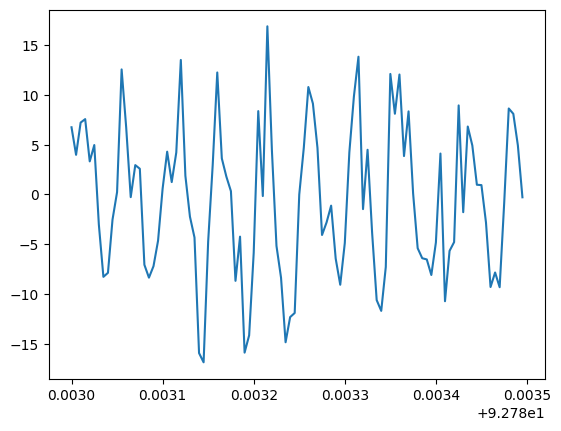

"# Make hanning window for spectral leackage\nhanning_window = np.hanning(len(AI0_voltage))\n\n# Apply the window to the signal\nfft_AI0_voltage = AI0_voltage * hanning_window\nfreqs, fft_values = daq.performRFFT(fft_AI0_voltage, daq.samplerate)\n\nplt.scatter(freqs, np.abs(fft_values), s=0.5)\nplt.xscale('log')\nplt.yscale('log')\nplt.axvline(20000)\nplt.show()\nprint(np.max(np.abs(fft_values)))\n"

In [10]:
filename = 'data'
data = np.load(f'data/{filename}.npz')
time_array = timeArray #data['time']
AI0_voltage = data['voltage']

def add_awgn(signal, snr_db):
    """Add AWGN noise to the signal with a given SNR in dB."""
    signal_power = np.mean(np.square(signal))
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear

    noise = np.random.normal(0, np.sqrt(noise_power), len(signal))
    return signal + noise


AI0_voltage = add_awgn(voltages, 1)

print(AI0_voltage)

pltStart = int(len(time_array)/2)
pltEnd = pltStart + 100

plt.plot(time_array[pltStart:pltEnd], AI0_voltage[pltStart:pltEnd])
plt.show()

'''# Make hanning window for spectral leackage
hanning_window = np.hanning(len(AI0_voltage))

# Apply the window to the signal
fft_AI0_voltage = AI0_voltage * hanning_window
freqs, fft_values = daq.performRFFT(fft_AI0_voltage, daq.samplerate)

plt.scatter(freqs, np.abs(fft_values), s=0.5)
plt.xscale('log')
plt.yscale('log')
plt.axvline(20000)
plt.show()
print(np.max(np.abs(fft_values)))
'''

done correlation
BIT START: 87800


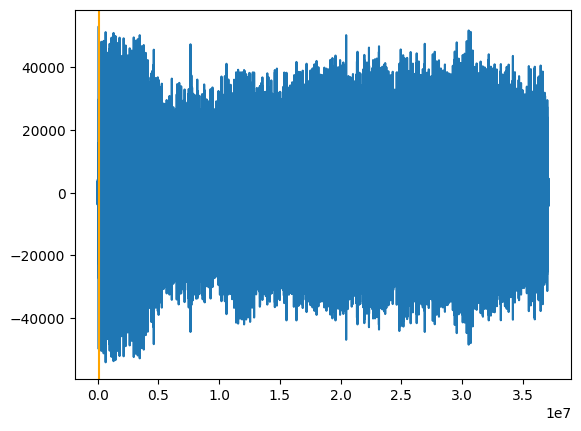

In [11]:
# Correlate with preamble to find start of message
PREAMBLE_BITS = [0,0,0,0,0,0,1,0]*5

preamble_pm = PM.binary_to_pm(preamble_bits, fmType=1)
preamble_waveform = PM.pm_to_voltage_array(preamble_pm, sps, f=carrierFrequency, fs=daq.samplerate, A=amplitude)

received_signal = AI0_voltage
correlation = scipy.signal.correlate(received_signal, preamble_waveform, mode='valid')
print("done correlation")
bit_start = np.argmax(correlation)
print("BIT START:", bit_start)

plt.plot(correlation)
plt.axvline(bit_start, c='orange')
plt.show()

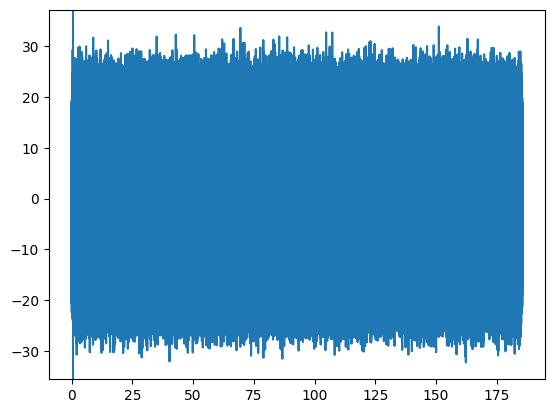

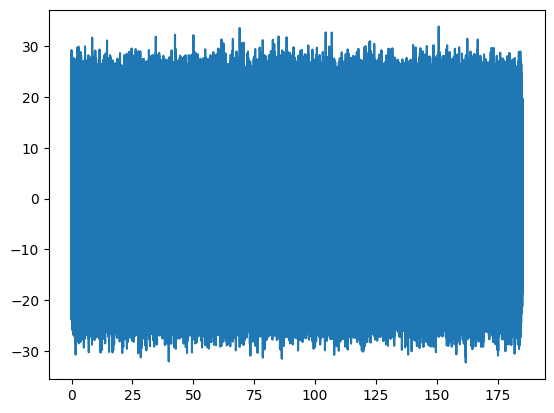

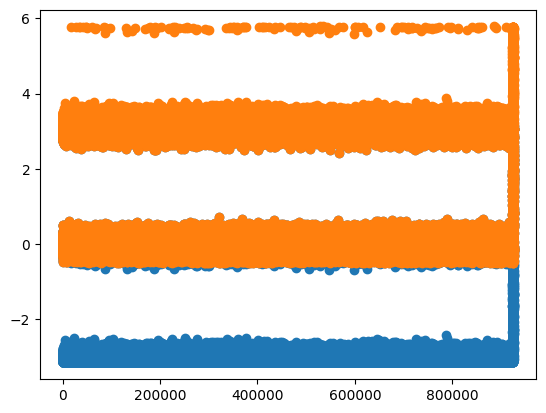

In [12]:
plot = True
idx = bit_start
t1 = time_array[idx:] - time_array[idx]
received_signal = AI0_voltage[idx:]

if plot:
    plt.plot(time_array, AI0_voltage)
    plt.axvline(time_array[bit_start])
    plt.show()
    # Slice the received signal and begin coutning at 0 again
    plt.plot(t1,received_signal)
    plt.show()
# Demodulate the received signal

_, _, phases = PM.retrieve_phases(received_signal, daq.samplerate, sps, carrierFrequency, plot=False, plotL=100)

phases_normalized = np.mod(phases, 2 * np.pi)
threshold = 2 * np.pi - 0.5
phases_normalized = np.where(phases_normalized > threshold, phases_normalized - 2 * np.pi, phases_normalized)

if plot:
    plt.scatter(np.arange(len(phases)), phases)
    plt.scatter(np.arange(len(phases)), phases_normalized)

    plt.show
from sklearn.cluster import KMeans

In [13]:
retrieved_bits, retrieved_bits_inv = PM.pm_to_binary(phases_normalized, fmType=1)

KMeans(n_clusters=2, n_init=10, random_state=0)
centers:  [3.14377227e+00 1.48392554e-03]


In [29]:
plot = False
message_bits = np.array([int(b) for b in binary_text if b in '01'])
retrieved_bits = np.array(retrieved_bits, dtype=np.int8).flatten()
retrieved_bits_inv = np.array(retrieved_bits_inv, dtype=np.int8).flatten()

# Convert bits from {0, 1} to {-1, 1} for cross-correlation
def bits_to_pmform(bits):
    return 2 * bits - 1

msg_pm = bits_to_pmform(message_bits[:100])
normal_pm = bits_to_pmform(retrieved_bits)
inverted_pm = bits_to_pmform(retrieved_bits_inv)

# Cross-correlation
corr_normal = np.correlate(normal_pm, msg_pm, mode='valid')
corr_inverted = np.correlate(inverted_pm, msg_pm, mode='valid')

# Find best matches
start_idx_normal = np.argmax(corr_normal)
#start_idx_inverted = np.argmax(corr_inverted)

print("Best normal match at index:", start_idx_normal, "score:", corr_normal[start_idx_normal])

if plot:
    # Plot correlations
    plt.plot(corr_normal, label='Normal')
    plt.plot(corr_inverted, label='Inverted')
    plt.axvline(start_idx_normal, color='green', linestyle='--', label='Normal match')
    #plt.axvline(start_idx_inverted, color='red', linestyle='--', label='Inverted match')
    plt.legend()
    plt.title("Correlation with binary_text")
    plt.show()


Best normal match at index: 40 score: 100


In [30]:
for i in range(1):
    start = start_idx_normal + i
    end_index = start + len(message_bits)
    extracted_bits = retrieved_bits[start:end_index]

    # Truncate to match
    min_len = min(len(message_bits), len(extracted_bits))
    extracted_bits = extracted_bits[:min_len]
    reference_bits = message_bits[:min_len]

    # Accuracy
    correct_bits = np.sum(extracted_bits == reference_bits)
    accuracy = 100 * correct_bits / min_len
    print(f"Bit accuracy: {accuracy:.2f}%")
    if type == 'image':
        reconstructed = bits_to_image(extracted_bits, shape, mode)
        reconstructed.show()
    if type == 'text':
        bit_str = ''.join(str(b) for b in extracted_bits)
        bit_str_spaced = ' '.join(bit_str[i:i+8] for i in range(0, len(bit_str), 8))
        text = PM.binary_to_text(bit_str_spaced)
        print(f"Bit accuracy: {accuracy:.2f}%")
        print(f"Decoded message: {text}")           

'''
    try:
        if type == 'image':  # Use a safer variable name
            reconstructed = bits_to_image(extracted_bits, shape, mode)
            reconstructed.show()
            print(f"Bit accuracy: {accuracy:.2f}%")
        else:
            # Convert to spaced binary string
            bit_str = ''.join(str(b) for b in extracted_bits)
            bit_str_spaced = ' '.join(bit_str[i:i+8] for i in range(0, len(bit_str), 8))
            text = PM.binary_to_text(bit_str_spaced)
            print(f"Bit accuracy: {accuracy:.2f}%")
            print(f"Decoded message: {text}")
    except Exception as e:
        print("An error occurred:", e)

'''


Bit accuracy: 99.98%


'\n    try:\n        if type == \'image\':  # Use a safer variable name\n            reconstructed = bits_to_image(extracted_bits, shape, mode)\n            reconstructed.show()\n            print(f"Bit accuracy: {accuracy:.2f}%")\n        else:\n            # Convert to spaced binary string\n            bit_str = \'\'.join(str(b) for b in extracted_bits)\n            bit_str_spaced = \' \'.join(bit_str[i:i+8] for i in range(0, len(bit_str), 8))\n            text = PM.binary_to_text(bit_str_spaced)\n            print(f"Bit accuracy: {accuracy:.2f}%")\n            print(f"Decoded message: {text}")\n    except Exception as e:\n        print("An error occurred:", e)\n\n'

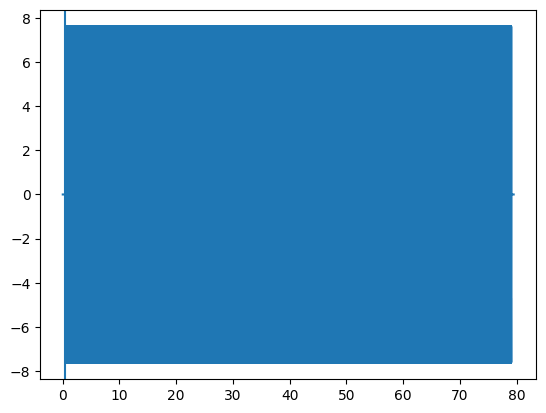

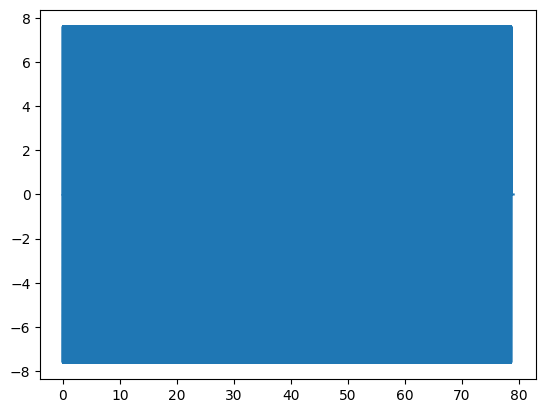

KMeans(n_clusters=2, n_init=10, random_state=0)
centers:  [3.14159265e+00 1.15196075e-10]
Best normal match at index: 40 score: 100
Decoded message: ERV
English Revised Version
Genesis 1:1	In the beginning God created the heaven and the earth.
Genesis 1:2	And the earth was waste and void; and darkness was upon the face of the deep: and the spirit of God moved upon the face of the waters.
Genesis 1:3	And God said, Let there be light: and there was light.
Genesis 1:4	And God saw the light, that it was good: and God divided the light from the darkness.
Genesis 1:5	And God called the light Day, and the darkness he called Night. And there was evening and there was morning, one day.
Genesis 1:6	And God said, Let there be a firmament in the midst of the waters, and let it divide the waters from the waters.
Genesis 1:7	And God made the firmament, and divided the waters which were under the firmament from the waters which were above the firmament: and it was so.
Genesis 1:8	And God called the f

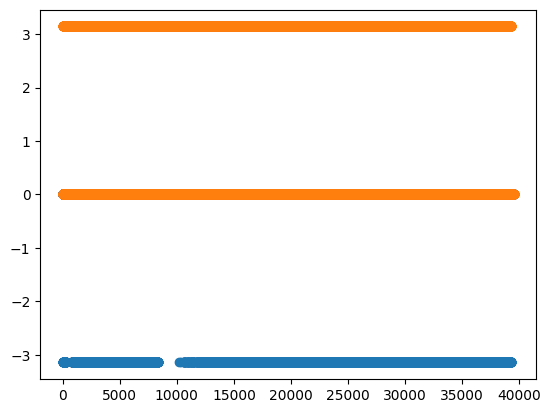

In [11]:
plot = True
idx = bit_start
t1 = time_array[idx:] - time_array[idx]
received_signal = AI0_voltage[idx:]

if plot:
    plt.plot(time_array, AI0_voltage)
    plt.axvline(time_array[bit_start])
    plt.show()
    # Slice the received signal and begin coutning at 0 again
    plt.plot(t1,received_signal)
    plt.show()
# Demodulate the received signal

_, _, phases = PM.retrieve_phases(received_signal, daq.samplerate, sps, carrierFrequency, plot=False, plotL=100)

retrieved_bits, retrieved_bits_inv, phases_normalized = PM.pm_to_binary(phases, fmType=1)

if plot:
    plt.scatter(np.arange(len(phases)), phases)
    plt.scatter(np.arange(len(phases)), phases_normalized)
    plt.show
from sklearn.cluster import KMeans

message_bits = np.array([int(b) for b in binary_text if b in '01'])
retrieved_bits = np.array(retrieved_bits, dtype=np.int8).flatten()
retrieved_bits_inv = np.array(retrieved_bits_inv, dtype=np.int8).flatten()

# Convert bits from {0, 1} to {-1, 1} for cross-correlation
def bits_to_pmform(bits):
    return 2 * bits - 1

msg_pm = bits_to_pmform(message_bits[:100])
normal_pm = bits_to_pmform(retrieved_bits)
inverted_pm = bits_to_pmform(retrieved_bits_inv)

# Cross-correlation
corr_normal = np.correlate(normal_pm, msg_pm, mode='valid')
corr_inverted = np.correlate(inverted_pm, msg_pm, mode='valid')

# Find best matches
start_idx_normal = np.argmax(corr_normal)
#start_idx_inverted = np.argmax(corr_inverted)

print("Best normal match at index:", start_idx_normal, "score:", corr_normal[start_idx_normal])
#print("Best inverted match at index:", start_idx_inverted, "score:", corr_inverted[start_idx_inverted])

for i in range(1):
    start = start_idx_normal + i
    end_index = start + len(message_bits)
    extracted_bits = retrieved_bits[start:end_index]

    # Truncate message_bits to match length (if message_bits is shorter, this still works)
    min_len = min(len(message_bits), len(extracted_bits))
    extracted_bits = extracted_bits[:min_len]
    reference_bits = message_bits[:min_len]

    # Accuracy calculation
    correct_bits = np.sum(extracted_bits == reference_bits)
    accuracy = 100 * correct_bits / min_len

    # Convert bits into space-separated string of 8-bit chunks
    bit_str = ''.join(str(b) for b in extracted_bits)
    bit_str_spaced = ' '.join(bit_str[i:i+8] for i in range(0, len(bit_str), 8))

    # Decode
    text = PM.binary_to_text(bit_str_spaced)
    print(f"Decoded message: {text}")
    print(f"Bit accuracy: {accuracy:.2f}%")


In [44]:
decoded = bitstream_to_string(bpsk_demodulated)

def flip_bits(bit_array):
    return 1 - bit_array

print("Decoded messageaaaaaaaaaaaaaaaaaa:")  # Should print "hello_world"
print(bpsk_demodulated)
print(flip_bits(np.asarray(bpsk_demodulated)))
print(bitstream_to_string(flip_bits(np.asarray(bpsk_demodulated))))


Decoded messageaaaaaaaaaaaaaaaaaa:
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

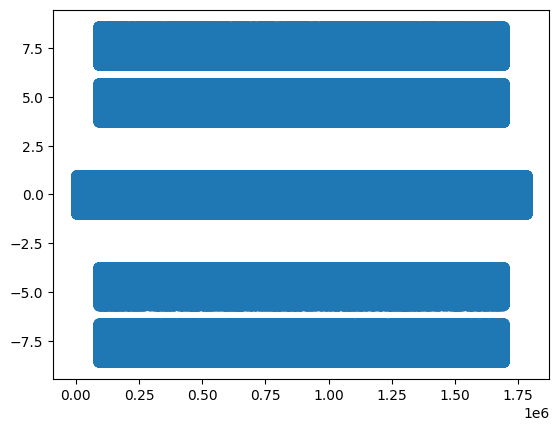

87801 1696799


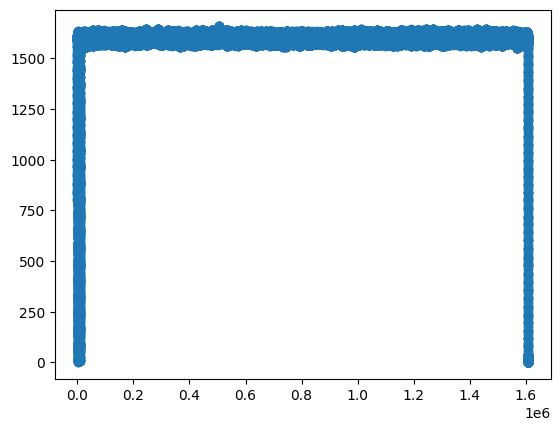

IndexError: index 0 is out of bounds for axis 0 with size 0

In [24]:
data = voltages
noise = np.random.uniform(-1, 1, len(data))
data += noise

plt.scatter(np.arange(len(data)), data)
plt.show()
timeArray = np.arange(len(data)) / daq.samplerate
#print(data)+
thresholds = np.where(np.abs(data)>1.8)
print(thresholds[0][0], thresholds[0][-1] + 1000)
amplitudes = []
for i in range(thresholds[0][0]-100, thresholds[0][-1] + 1000):
    amplitude, phase = PM.lock_in_amplifier(data[i:i+sps], daq.samplerate, carrierFrequency, timeArray[i:i+sps])
    amplitudes.append(amplitude)
plt.scatter(range(0, len(amplitudes)), amplitudes)
plt.show()
indices = np.where(np.abs(np.array(amplitudes)) > 300)
start = indices[0][0] - 10
end = indices[0][-1] + 10
#print(start, end)
signal_slice = data[start:end]

_, _, phases = PM.retrieve_phases(signal_slice, daq.samplerate, sps, carrierFrequency)

phases += -phases[0]

binary = PM.pm_to_binary(phases, fmType=1)
text = PM.binary_to_text(binary)
print(binary)
print(text)

bits.append(binary)
#print(phases)

plt.scatter(range(start, end), signal_slice)
plt.show()

In [ ]:
for item in bits:
    print(item)

01010101 01010101 01010101 01010101 01110111 01010111 01010101 01010101 01100001 01100001 11100001 01100001 01100001 01100001 01100001 01110001 01100001 1110000
01010101 01010101 01010101 01010101 01010101 01010101 01010101 01010101 01100001 01100001 01100001 01100001 01100001 01100001 01100001 01100001 01100001 0110000
01110111 11011111 01010101 01010101 11110111 11010111 11010101 01110101 01111101 11101001 11101101 01111001 01110111 01110011 01111101 11100101 11110111 0110101


In [81]:
with open("bible.txt", "r", encoding="utf-8") as file:
    inhoud = file.read()

# Print eventueel de eerste 500 tekens ter controle
print(inhoud[:500])

ERV
English Revised Version
Genesis 1:1	In the beginning God created the heaven and the earth.
Genesis 1:2	And the earth was waste and void; and darkness was upon the face of the deep: and the spirit of God moved upon the face of the waters.
Genesis 1:3	And God said, Let there be light: and there was light.
Genesis 1:4	And God saw the light, that it was good: and God divided the light from the darkness.
Genesis 1:5	And God called the light Day, and the darkness he called Night. And there was eve


In [11]:
daq.name = 'MyDAQ1'
daq.samplerate = int(1000)
read_channel = 'AI0'	
write_channel = 'AO0'
carrierFrequency = 20000
sps = 100
amplitude = 2
#transfer function. UItzoeken hoe normaal werkt (telefoon), 
text = "aaaaaaaaaaAppelflappenkkkkkkkkkkkkkkkjhgkhgcvblkjgftuyseryiuygfcgfcgvhm,nxztretrertlukyeuyytkuygvcjghyukhgvcty6775i86oilki7r56tiyukljgdfguklhftrywuyturtgfjdfghuiy78i67yu"
binary = PM.text_to_binary(text)
#print(binary)
fm_signal = PM.binary_to_pm(binary, fmType=1)
#print(fm_signal)
configuringSignal = PM.configuring_signal(daq.samplerate, sps, 10)
#print(configuringSignal)
voltages = PM.pm_to_voltage_array(fm_signal, sps, f=carrierFrequency, fs=daq.samplerate, A=amplitude, pmConfigurationSignal=configuringSignal)


In [8]:
daq.write(voltages, write_channel)

In [ ]:
PM.configure_signal(voltages, daq.samplerate, carrierFrequency, sps, 10)


_, _, phases = PM.retrieve_phases(voltages, daq.samplerate, sps, carrierFrequency)
print('phases: ', np.round(np.array(phases) / np.pi * 180))

binary_back = PM.pm_to_binary(np.rad2deg(phases), fmType=1)
print("Recovered Binary:", binary_back)

text_back = PM.binary_to_text(binary_back)
print("Recovered Text:", text_back)

In [ ]:
daq.name = 'MyDAQ1'
daq.samplerate = int(2e5)
read_channel = 'AI0'	
write_channel = 'AO0'
carrierFrequency = 2e4
sps = 20000
amplitude = 2

text = "Hi!"
binary = PM.text_to_binary(text)
fm_signal = PM.binary_to_pm(binary, fmType=1)

voltages = PM.pm_to_voltage_array(fm_signal, sps, f=carrierFrequency, fs=daq.samplerate, A=amplitude)


In [ ]:
print(len(voltages))
#data = daq.readwrite(voltages, read_channel, write_channel)
data = voltages
window = np.hanning(len(data))
windowed_data = data * window
fft = np.fft.rfft(windowed_data)
freqs = np.fft.rfftfreq(len(data), 1 / daq.samplerate)
amplitude = np.abs(fft)

# Plot
#plt.figure(figsize=(10, 6))
#plt.scatter(freqs, amplitude, s=10, color='darkblue', alpha=0.7, label='FFT Amplitude')
#plt.axvline(carrierFrequency)
#lt.xscale('log')
#plt.yscale('log')  # Optional: helps when amplitudes span multiple orders
#plt.xlabel('Frequency (Hz)')
#plt.ylabel('Amplitude')
#plt.title('Frequency Spectrum (FFT)')
#plt.grid(True, which='both', linestyle='--', linewidth=0.5)
##plt.legend()
#plt.tight_layout()
#plt.show()

_, amplitudes, phases = PM.retrieve_phases(data, daq.samplerate, sps, carrierFrequency)

print(len(phases), len(fm_signal))

binary_back = PM.pm_to_binary(phases, fmType=1)
print("Recovered Binary:", binary_back)

text_back = PM.binary_to_text(binary_back)
print("Recovered Text:", text_back)

In [ ]:
plt.scatter(np.linspace(0, len(phases), len(phases)), phases)
plt.show()

In [ ]:
tArray = np.linspace(0, len(voltages) / daq.samplerate, len(voltages), endpoint=False)
print(voltages.shape)
data = daq.readwrite(voltages, read_channel, write_channel)
tArrayd = np.linspace(0, len(data) / daq.samplerate, len(data), endpoint=False)

print(len(tArrayd), len(data), len(voltages))

plt.scatter(tArray, voltages, s=1)  # s=1 to avoid huge dots
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Time-Domain Signal')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.scatter(tArrayd, data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Time-Domain Signal')
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
duration = 5
amplitude = 2
freq = 20000
phase = 0
_, signal = daq.generateWaveform('sine', daq.samplerate, freq, amplitude, phase, duration)
signal = []
for i in range(0, 6):
    for j in range(0, 20000):
        signal.append((i - 3))
data = daq.readwrite(np.array(signal), read_channel, write_channel)
plt.scatter(np.arange(len(signal)), signal, label='sig')
plt.scatter(np.arange(len(data)), data, label='data')
plt.legend()
plt.show()

print(len(signal) - len(data))
countt = 0
for i in range(0, 6):
    count = np.sum(np.abs(data - (i-3)) <= 0.1)
    countt += count
    print(f"{count} data points are within 0.1 V of 6 V.")
print(countt)
print(len(data))

In [ ]:

def string_to_bitstream(message):
    
    """
    Converts a string to a list of bits (0s and 1s) using ASCII encoding.

    Example: "hi" -> [0,1,1,0,1,0,0,0, 0,1,1,0,1,0,0,1]
    """
    bitstream = []
    for char in message:
        ascii_val = ord(char)  # ASCII value
        bits = format(ascii_val, '08b')  # 8-bit binary string
        bitstream.extend([int(b) for b in bits])
    return bitstream
def bpsk_modulate(bitstream, bit_rate=1e3, carrier_freq=20e3, sampling_rate=daq.samplerate):
    """
    BPSK modulator.

    Parameters:
        bitstream      : list or array of bits (0s and 1s)
        bit_rate       : how many bits per second
        carrier_freq   : carrier frequency in Hz
        sampling_rate  : samples per second (must be >> carrier_freq)
    
    Returns:
        t              : time array
        dds_wave : the BPSK modulated signal
    """
    bitstream = np.array(bitstream)
    T_bit = 1 / bit_rate
    samples_per_bit = int(sampling_rate * T_bit)

    # Time array for the whole signal
    t = np.arange(0, len(bitstream) * T_bit, 1 / sampling_rate)
    
    # Phase values: 0 for bit 0, pi for bit 1
    phase_shifts = np.pi * bitstream.repeat(samples_per_bit)
    
    # Carrier
    carrier = 10*np.sin(2 * np.pi * carrier_freq * t + phase_shifts)
    
    return t, carrier, phase_shifts
def bpsk_demodulate(received_signal, bit_rate=1e3, carrier_freq=20e3, sampling_rate=daq.samplerate, plot=False):
    """
    BPSK demodulator using correlation method.

    Parameters:
        received_signal : the BPSK signal (1D numpy array)
        bit_rate        : same as used in modulation
        carrier_freq    : same carrier frequency
        sampling_rate   : must match modulation
    
    Returns:
        recovered_bits  : list of 0s and 1s
    """
    T_bit = 1 / bit_rate
    samples_per_bit = int(sampling_rate * T_bit)
    num_bits = len(received_signal) // samples_per_bit

    recovered_bits = []

    for i in range(num_bits):
        # Slice for current bit
        segment = received_signal[i * samples_per_bit : (i + 1) * samples_per_bit]
        plot_segment = received_signal[i * samples_per_bit - 100 : (i + 1) * samples_per_bit + 100]
        if plot:
            if i % 1000 == 0:
                print(i)
                plt.plot(np.arange(len(plot_segment)), plot_segment)
                plt.axvline(100, c='orange')
                plt.axvline(len(plot_segment)-100, c='orange')
                plt.show()
        # Reference carrier (assumes perfect sync)
        t = np.arange(samples_per_bit) / sampling_rate
        reference = np.cos(2 * np.pi * carrier_freq * t)

        # Correlate (dot product / sum of product)
        product = segment * reference
        correlation = np.sum(product)
        #print(correlation)
        # Decision based on sign
        bit = 0 if correlation >= 0 else 1
        recovered_bits.append(bit)

    return recovered_bits
def bitstream_to_string(bitstream):
    """
    Converts a list of bits back into a string (assumes 8-bit ASCII).
    """
    chars = []
    for i in range(0, len(bitstream), 8):
        byte = bitstream[i:i+8]
        byte_str = ''.join(str(b) for b in byte)
        chars.append(chr(int(byte_str, 2)))
    return ''.join(chars)
def compare_bitstreams(original, received):
    """
    Compares two bitstreams and returns the percentage of correctly recovered bits.
    
    Parameters:
        original : list of original bits (0s and 1s)
        received : list of recovered bits (same length)

    Returns:
        accuracy_percentage : float
    """
    if len(original) != len(received):
        raise ValueError("Bitstreams must be of equal length.")
    
    correct = sum(o == r for o, r in zip(original, received))
    total = len(original)
    accuracy = (correct / total) * 100
    return accuracy
def format_bitstream(bitstream):
    pass